In [6]:
import csv
import os
import matplotlib.pyplot as plt
import random 
import numpy as np
from sklearn import linear_model

Family => Happiness Score

pentru v1: fiind toate scorurile Family egale modelul facut computeaza mereu aceeasi valoare (average-ul valorilor Happines Score)

In [7]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    selectedOutput = dataNames.index(outputVariabName)
    inputs = []
    outputs = []
    for i in range(len(data)):
      # if data[i][selectedVariable] == '' or data[i][selectedOutput] == '':
      #   continue
      inputs.append(float(data[i][selectedVariable]))
      outputs.append(float(data[i][selectedOutput]))
    
    return inputs, outputs

def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()
  

version = 'v3'
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', version + '_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')

# split data into training data (80%) and testing data (20%)
indexes = [i for i in range(len(inputs))]

np.random.seed(5)
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
# trainSample = random.sample(indexes, int(0.8 * len(inputs)))
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

training with sklearn

In [8]:
xx = [[el] for el in trainInputs]
regressor = linear_model.LinearRegression()
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])

training manually

In [9]:
class ManualLinearRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0

    # learn a linear univariate regression model by using training inputs (x) and outputs (y) 
    def fit(self, x, y):
        sx = sum(x)
        sy = sum(y)
        sx2 = sum(i * i for i in x)
        sxy = sum(i * j for (i,j) in zip(x, y))
        w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
        w0 = (sy - w1 * sx) / len(x)
        self.intercept_, self.coef_ =  w0, w1

    # predict the outputs for some new inputs (by using the learnt model)
    def predict(self, x):
        if (isinstance(x[0], list)):
            return [self.intercept_ + self.coef_ * val[0] for val in x]
        else:
            return [self.intercept_ + self.coef_ * val for val in x]
        
regressor = ManualLinearRegression()
regressor.fit(trainInputs, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])

Plotting results

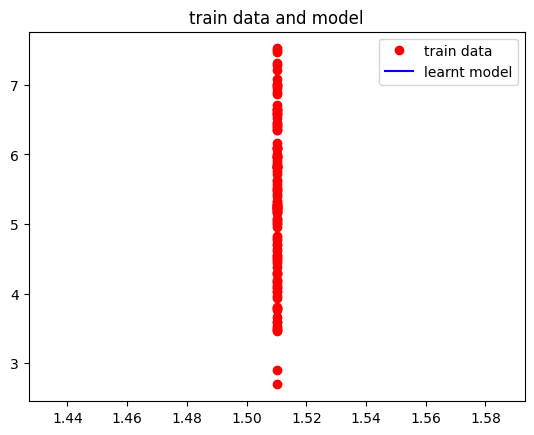

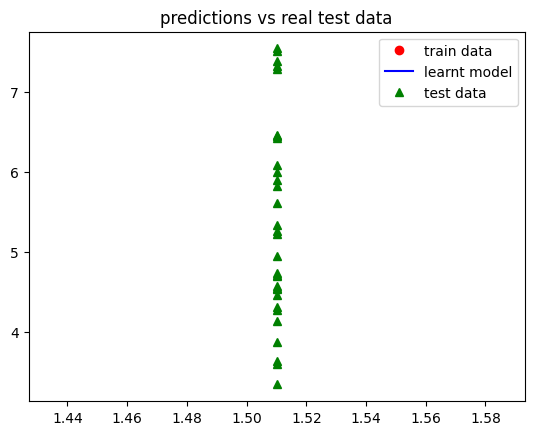

Mean Squared Prediction error:  0.6459376644526694


In [10]:
# plot the model
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 
plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")

plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictions vs real test data")

error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    if t1 - t2 < 0.000001:
        continue
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("Mean Squared Prediction error: ", error)